**Loading and Cleaning the Data**

In [ ]:
# Load the data

from google.colab import files
uploaded = files.upload()

Saving restaurant.xlsx to restaurant.xlsx
Saving review.xlsx to review.xlsx


In [ ]:
# importing libraries

import pandas as pd
import numpy as np

In [ ]:
# Load the datasets
restaurant_df = pd.read_excel("restaurant.xlsx")
review_df = pd.read_excel("review.xlsx")

# Display the first few rows of each dataframe to understand their structure
restaurant_df.head(), review_df.head()

(   rid   id                     name                               categories  \
 0   43   43           The Lobby Cafe                                  , Cafes   
 1  157  157  Ej?s Landing Restaurant                            , Steakhouses   
 2  183  183               McDonald?s                     , Burgers, Fast Food   
 3  230  229                 Bun Cafe                                  , Cafes   
 4  261  250  Panhelo Bakery And Cafe  , Cafes, Patisserie/Cake Shop, Bakeries   
 
   price                                        address    phonenumber  \
 0     $     9658 Baltimore Ave, College Park, MD 20740  (301)982-5370   
 1    \N     8601 Baltimore Ave, College Park, MD 20740  (301)474-5951   
 2    \N     8301 Baltimore Ave, College Park, MD 20740  (301)345-1072   
 3    \N         6150 Greenbelt Rd, Greenbelt, MD 20770  (301)345-0500   
 4    \N  1501 University Blvd E, Hyattsville, MD 20783            NaN   
 
    numberofreviews  averagerating  \
 0          9999999   

In [ ]:
# Replace placeholder '\N' values with NaN
restaurant_df.replace("\\N", pd.NA, inplace=True)

# Convert 'price' column to a numeric scale based on dollar signs
restaurant_df['price_level'] = restaurant_df['price'].apply(lambda x: str(x).count('$') if pd.notna(x) else pd.NA)

In [ ]:
# Replace "wrong!" in 'categories' with NaN
restaurant_df['categories'].replace("wrong!", np.nan, inplace=True)

<ipython-input-7-62b2a32307f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  restaurant_df['categories'].replace("wrong!", np.nan, inplace=True)


In [ ]:
# Set upper limit for 'numberofreviews' (e.g., if it's greater than 1000, consider it an outlier and replace it with NaN)
restaurant_df['numberofreviews'] = pd.to_numeric(restaurant_df['numberofreviews'], errors='coerce')
restaurant_df.loc[restaurant_df['numberofreviews'] > 1000, 'numberofreviews'] = np.nan

# Filter 'averagerating' column to be within a realistic range (e.g., 1 to 5)
restaurant_df['averagerating'] = pd.to_numeric(restaurant_df['averagerating'], errors='coerce')
restaurant_df.loc[(restaurant_df['averagerating'] < 1) | (restaurant_df['averagerating'] > 5), 'averagerating'] = np.nan

In [ ]:
# Ensure date column is in datetime format
review_df['date'] = pd.to_datetime(review_df['date'], errors='coerce')

In [ ]:
# Drop rows where critical columns are still missing after cleaning (optional, if you need a cleaner dataset)
restaurant_df.dropna(subset=['categories', 'numberofreviews', 'averagerating'], inplace=True)

In [ ]:
# Merge restaurant and review DataFrames on 'rid' field
merged_df = pd.merge(review_df, restaurant_df, on='rid', how='inner')

**Exploratory Data Analysis**

Cuisine Popularity

In [ ]:
# Split categories into individual cuisines and count each type
cuisine_counts = restaurant_df['categories'].str.split(',').explode().str.strip().value_counts()
print("Cuisine Popularity:\n", cuisine_counts)

Cuisine Popularity:
 categories
                          787
Fast Food                  92
American (Traditional)     77
Chinese                    76
Pizza                      75
                         ... 
Kebab                       1
Popcorn Shops               1
Cooking Classes             1
Hookah Bars                 1
Dance Clubs                 1
Name: count, Length: 127, dtype: int64


Average Rating by Cuisine

In [ ]:
# Calculate the average rating for each cuisine type
# Explode 'categories' to associate each row with individual cuisines
expanded_cuisines = restaurant_df.assign(categories=restaurant_df['categories'].str.split(',')).explode('categories')
expanded_cuisines['categories'] = expanded_cuisines['categories'].str.strip()

# Group by cuisine and calculate the mean rating
avg_rating_by_cuisine = expanded_cuisines.groupby('categories')['averagerating'].mean().sort_values(ascending=False)
print("Average Rating by Cuisine:\n", avg_rating_by_cuisine)

Average Rating by Cuisine:
 categories
Empanadas                5.000000
Indonesian               5.000000
Puerto Rican             5.000000
International Grocery    5.000000
Food Tours               4.500000
                           ...   
Burgers                  2.770833
Cafeteria                2.750000
Basque                   2.500000
Dance Clubs              2.500000
Food Court               2.000000
Name: averagerating, Length: 127, dtype: float64


Review Frequency Distribution

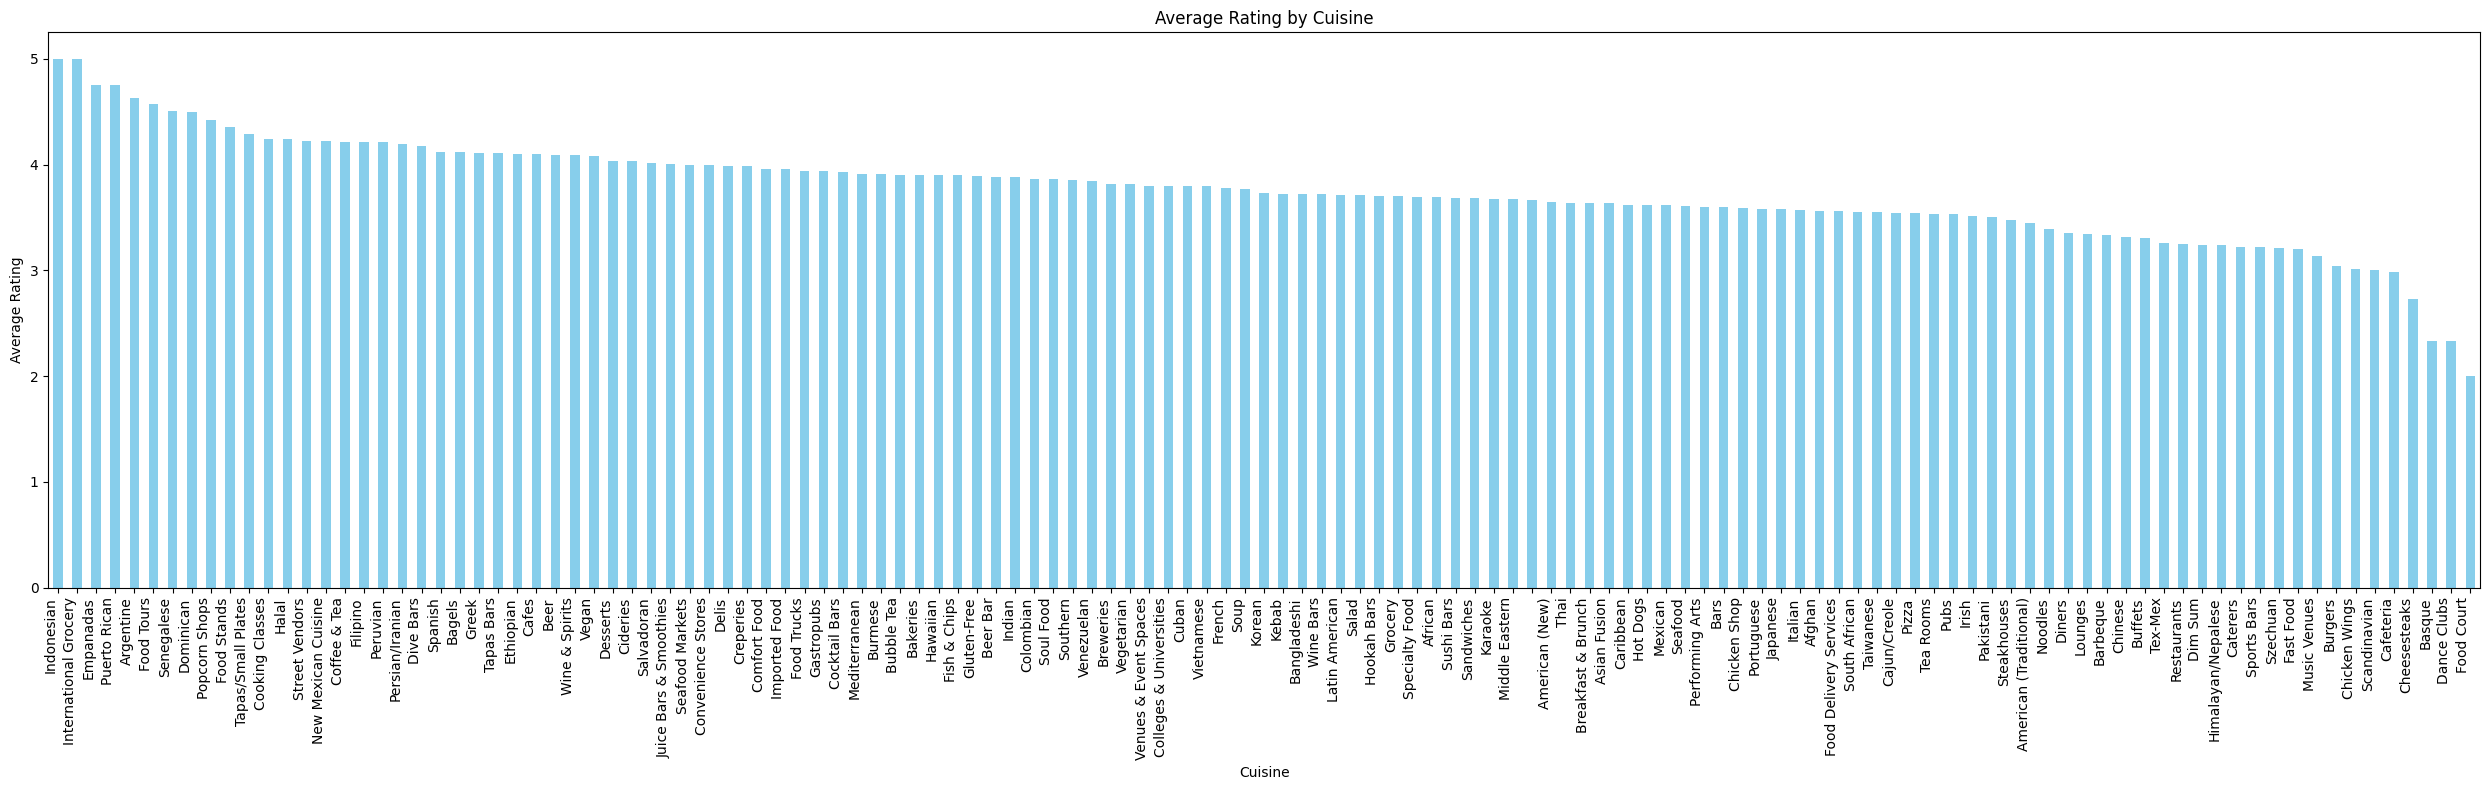

In [ ]:
import matplotlib.pyplot as plt

# Expand cuisines for each restaurant in the merged dataset
expanded_reviews = merged_df.assign(categories=merged_df['categories'].str.split(',')).explode('categories')
expanded_reviews['categories'] = expanded_reviews['categories'].str.strip()

# Calculate the average rating for each cuisine
average_rating_by_cuisine = expanded_reviews.groupby('categories')['rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 8))
average_rating_by_cuisine.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

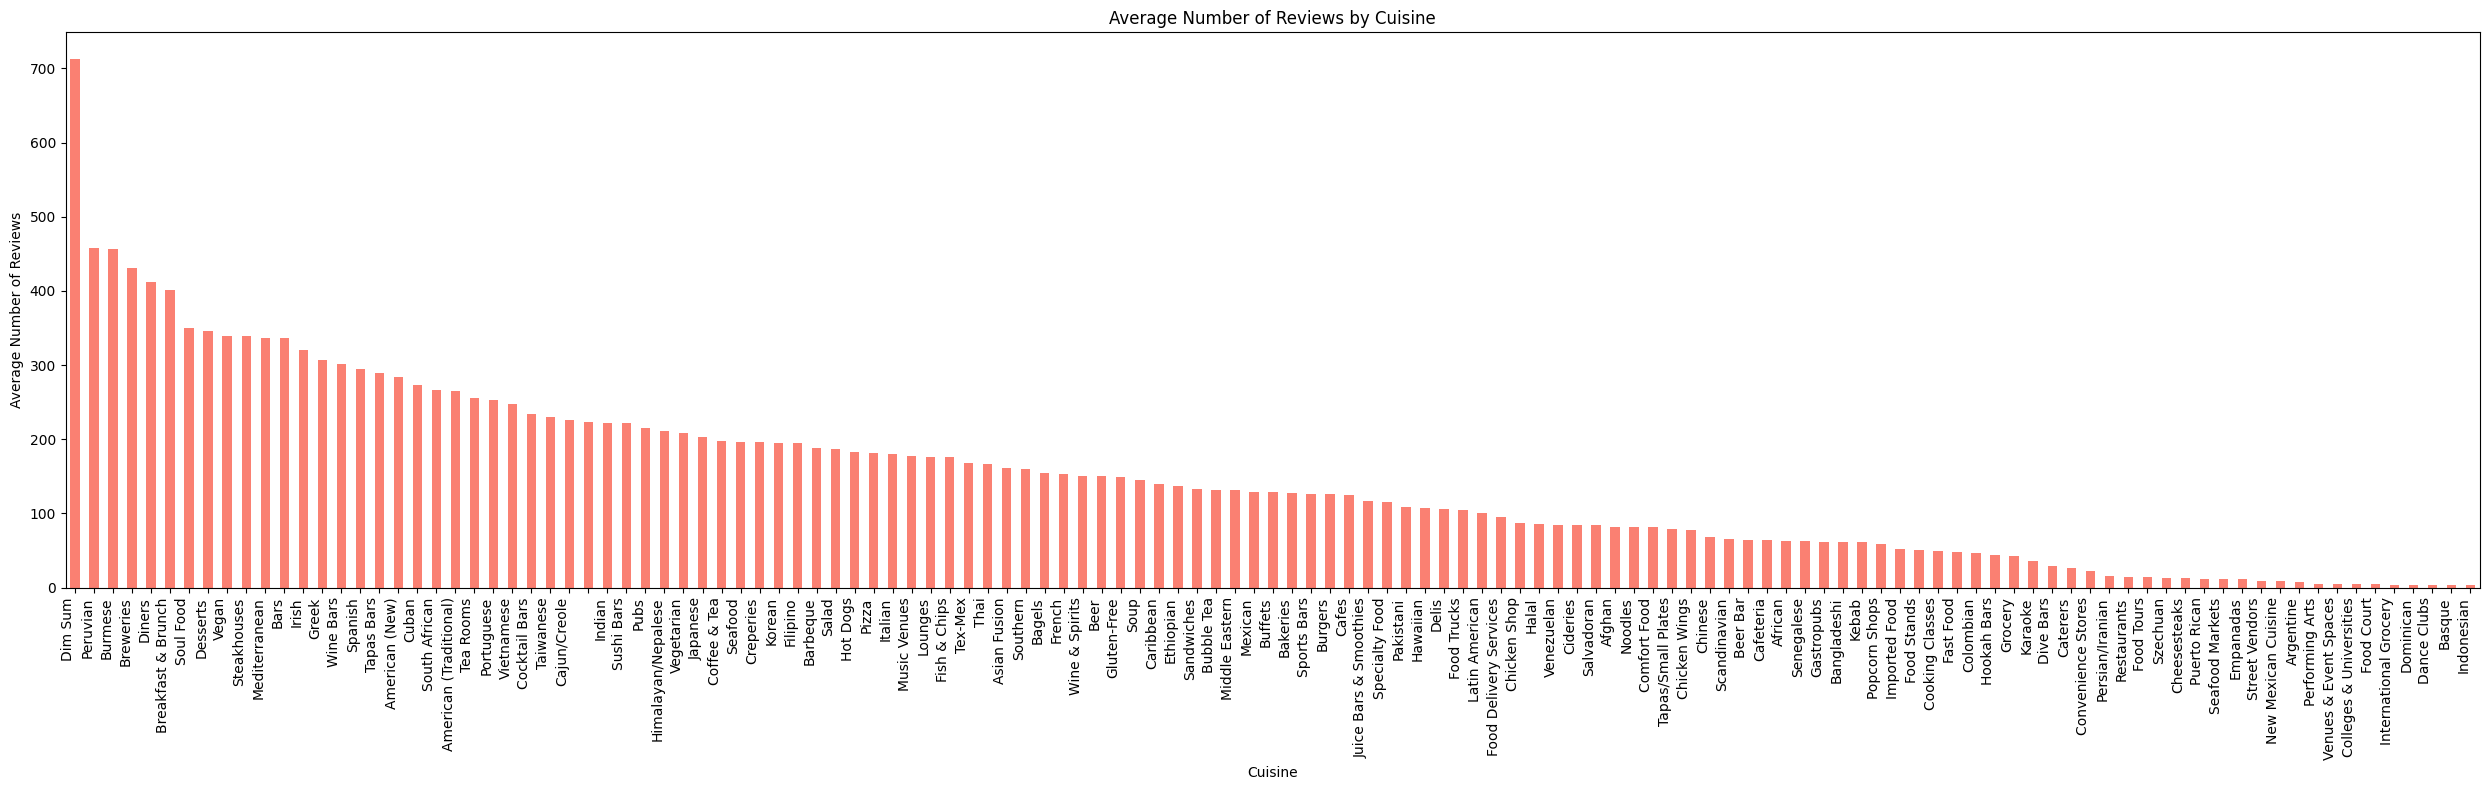

In [ ]:
import matplotlib.pyplot as plt

# Expand cuisines for each restaurant in the merged dataset
expanded_reviews = merged_df.assign(categories=merged_df['categories'].str.split(',')).explode('categories')
expanded_reviews['categories'] = expanded_reviews['categories'].str.strip()

# Calculate the average number of reviews for each cuisine
average_reviews_by_cuisine = expanded_reviews.groupby('categories')['numberofreviews'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 8))
average_reviews_by_cuisine.plot(kind='bar', color='salmon')
plt.title('Average Number of Reviews by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

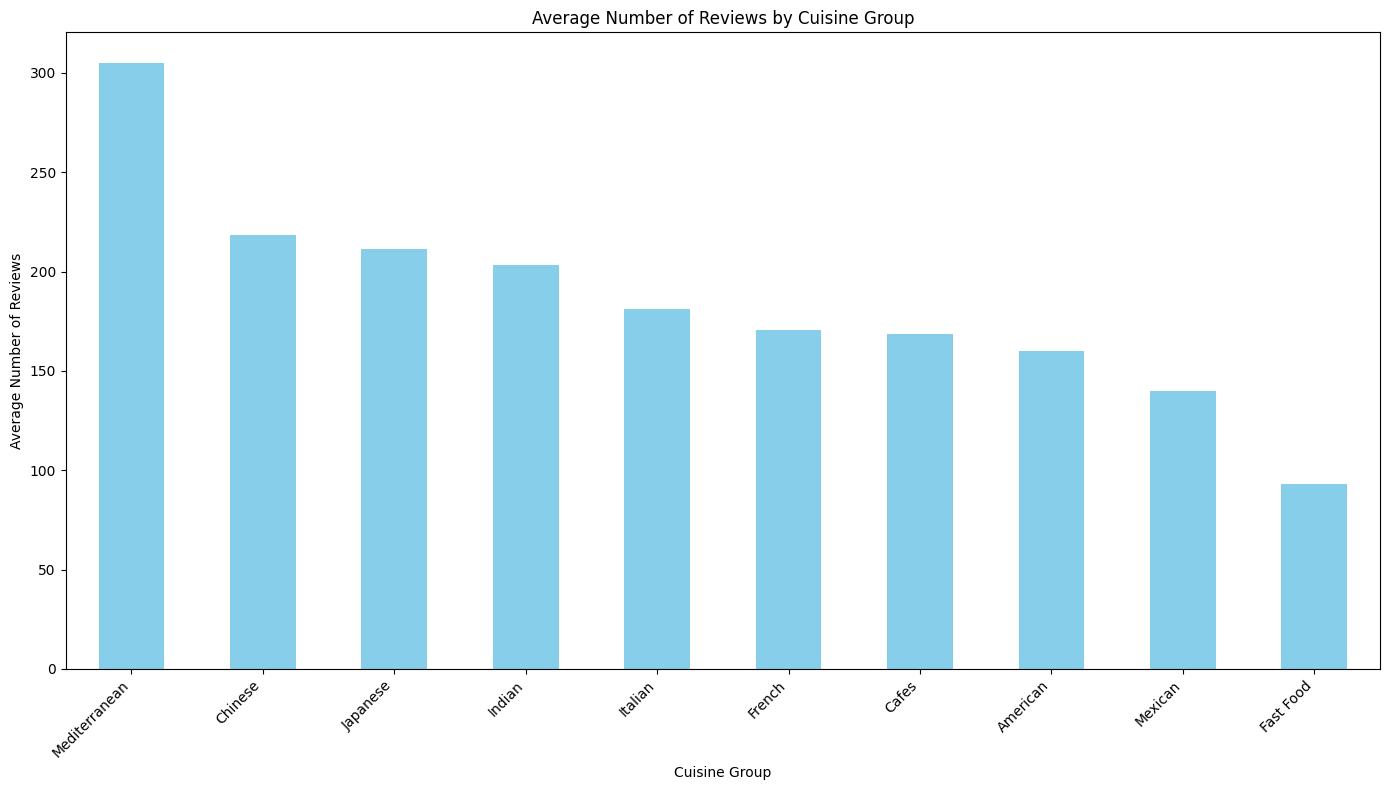

In [ ]:
import matplotlib.pyplot as plt

# Define category mappings
category_mapping = {
    'American': 'American', 'American New': 'American', 'American Traditional': 'American', 'Southern': 'American',
    'Italian': 'Italian', 'Pizza': 'Italian', 'Pasta': 'Italian',
    'Chinese': 'Chinese', 'Dim Sum': 'Chinese', 'Cantonese': 'Chinese', 'Szechuan': 'Chinese',
    'Japanese': 'Japanese', 'Sushi Bars': 'Japanese', 'Ramen': 'Japanese', 'Izakaya': 'Japanese',
    'Indian': 'Indian', 'Pakistani': 'Indian',
    'Mexican': 'Mexican', 'Tex-Mex': 'Mexican',
    'French': 'French', 'Creperies': 'French', 'Bistro': 'French',
    'Mediterranean': 'Mediterranean', 'Middle Eastern': 'Mediterranean', 'Turkish': 'Mediterranean', 'Greek': 'Mediterranean',
    'Cafes': 'Cafes', 'Coffee & Tea': 'Cafes',
    'Fast Food': 'Fast Food', 'Burgers': 'Fast Food', 'Hot Dogs': 'Fast Food'
}

# Expand cuisines and apply mapping to a new column for cuisine groups
expanded_reviews = merged_df.assign(categories=merged_df['categories'].str.split(',')).explode('categories')
expanded_reviews['categories'] = expanded_reviews['categories'].str.strip()  # Strip whitespace

# Apply the mapping and create a new column for cuisine groups
expanded_reviews['cuisine_group'] = expanded_reviews['categories'].map(category_mapping)

# Remove rows where 'cuisine_group' is NaN
expanded_reviews = expanded_reviews.dropna(subset=['cuisine_group'])

# Calculate the average number of reviews by cuisine group
average_reviews_by_group = expanded_reviews.groupby('cuisine_group')['numberofreviews'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
average_reviews_by_group.plot(kind='bar', color='skyblue')
plt.title('Average Number of Reviews by Cuisine Group')
plt.xlabel('Cuisine Group')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

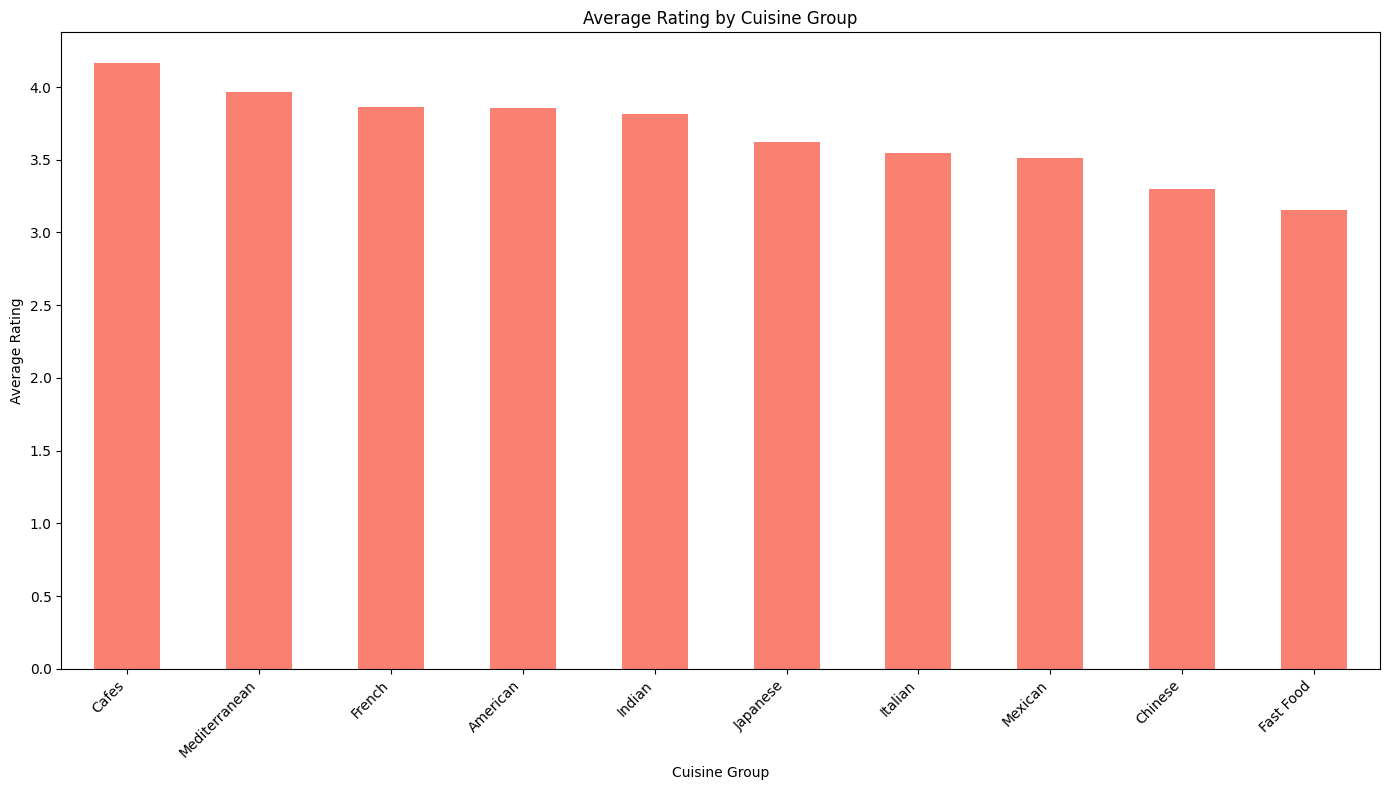

In [ ]:
import matplotlib.pyplot as plt

# Use the same expanded_reviews with cuisine groups as created before
# Calculate the average rating by cuisine group
average_rating_by_group = expanded_reviews.groupby('cuisine_group')['rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
average_rating_by_group.plot(kind='bar', color='salmon')
plt.title('Average Rating by Cuisine Group')
plt.xlabel('Cuisine Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

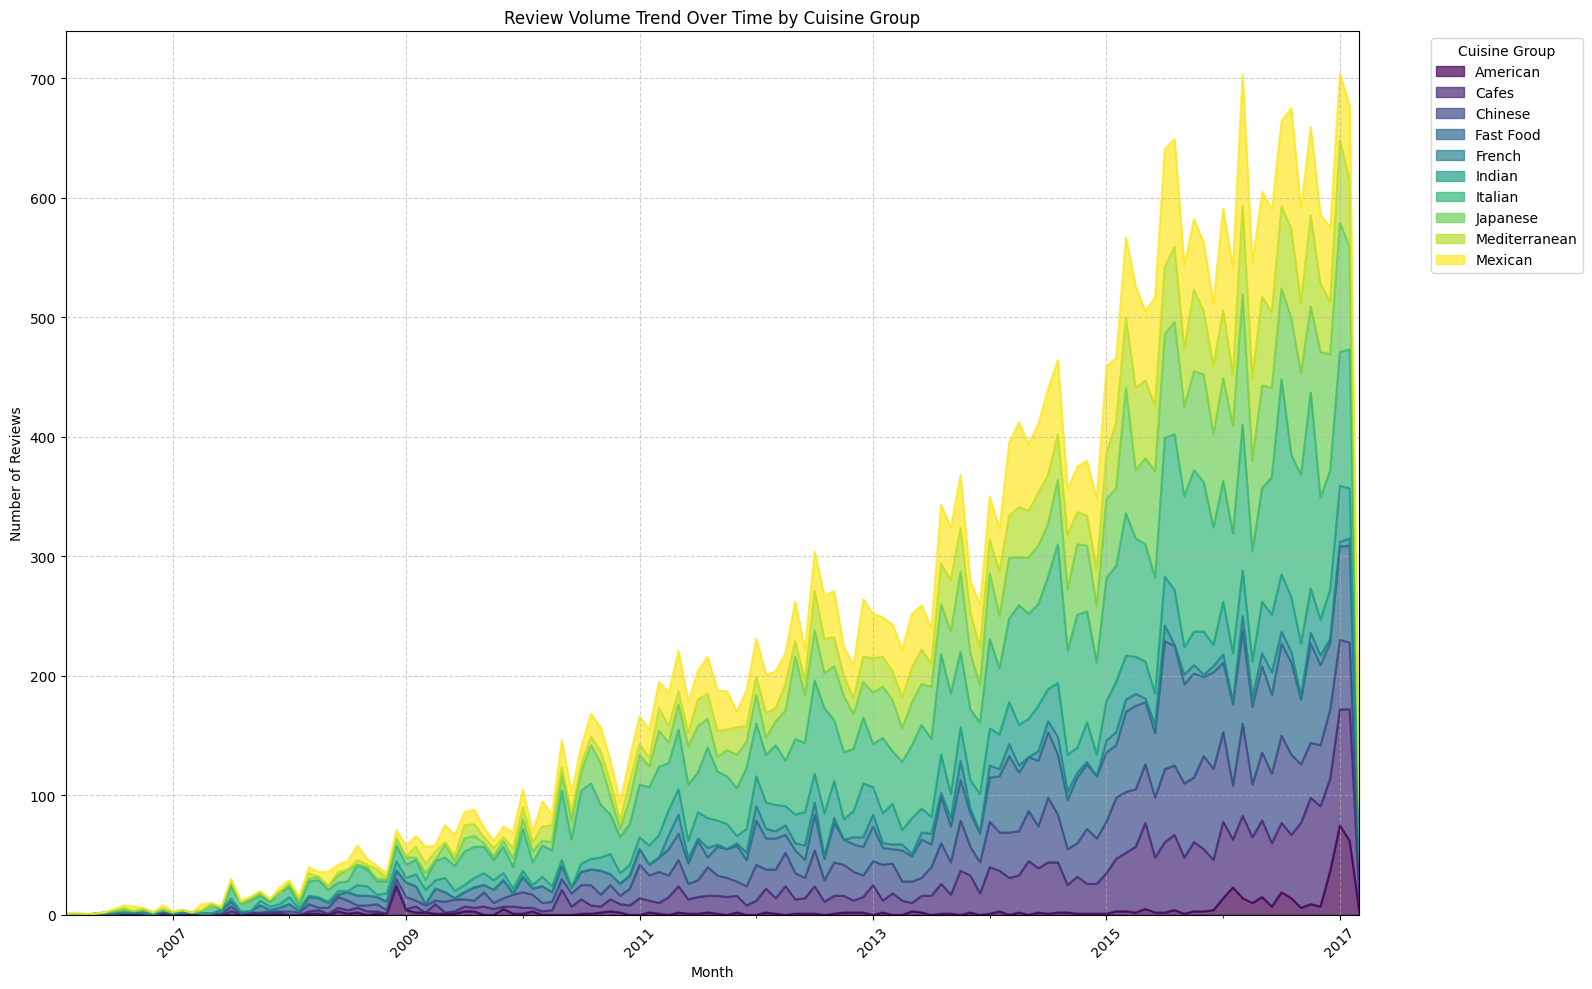

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
expanded_reviews['date'] = pd.to_datetime(expanded_reviews['date'], errors='coerce')

# Group by month and cuisine group, counting the number of reviews
expanded_reviews['month'] = expanded_reviews['date'].dt.to_period('M')  # Group by month
review_volume_trends = expanded_reviews.groupby(['month', 'cuisine_group']).size().unstack(fill_value=0)

# Plotting the stacked area chart
plt.figure(figsize=(16, 10))
review_volume_trends.plot(kind='area', stacked=True, ax=plt.gca(), alpha=0.7, colormap='viridis')
plt.title('Review Volume Trend Over Time by Cuisine Group')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cuisine Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)  # Add grid for better readability
plt.tight_layout()
plt.show()

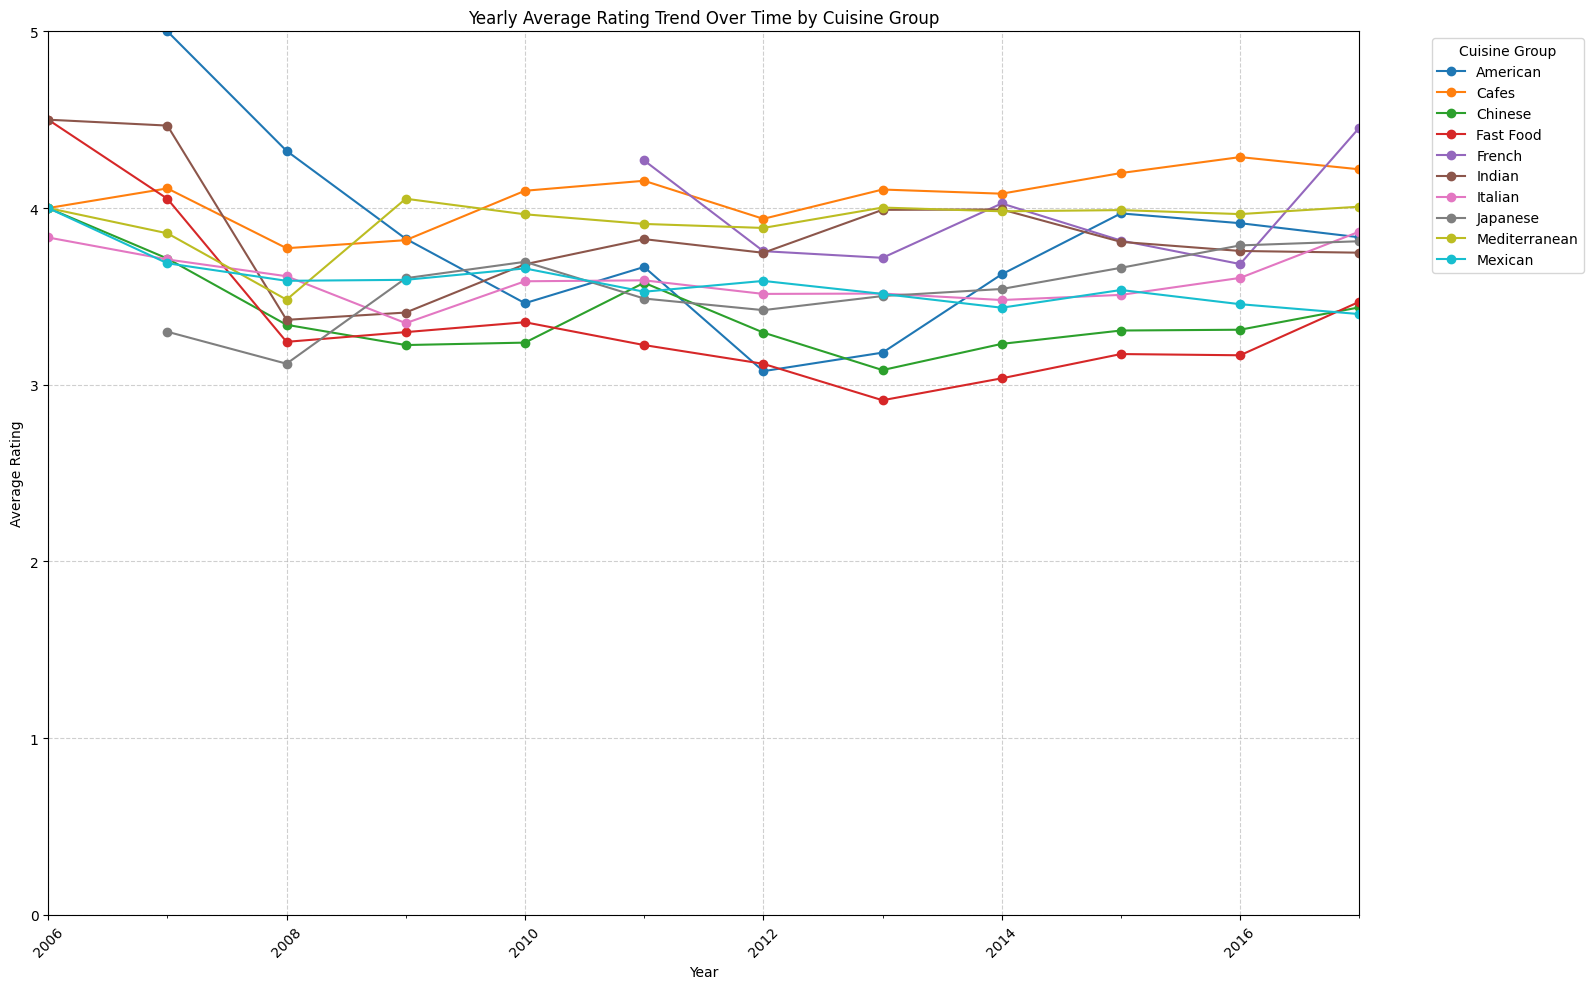

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
expanded_reviews['date'] = pd.to_datetime(expanded_reviews['date'], errors='coerce')

# Group by year and cuisine group, calculating the average rating over time
expanded_reviews['year'] = expanded_reviews['date'].dt.to_period('Y')  # Group by year
average_rating_trends = expanded_reviews.groupby(['year', 'cuisine_group'])['rating'].mean().unstack()

# Plotting the multi-line chart
plt.figure(figsize=(16, 10))
average_rating_trends.plot(ax=plt.gca(), marker='o', linewidth=1.5)
plt.title('Yearly Average Rating Trend Over Time by Cuisine Group')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set y-axis limit to match the rating scale
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cuisine Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)  # Add grid for better readability
plt.tight_layout()
plt.show()

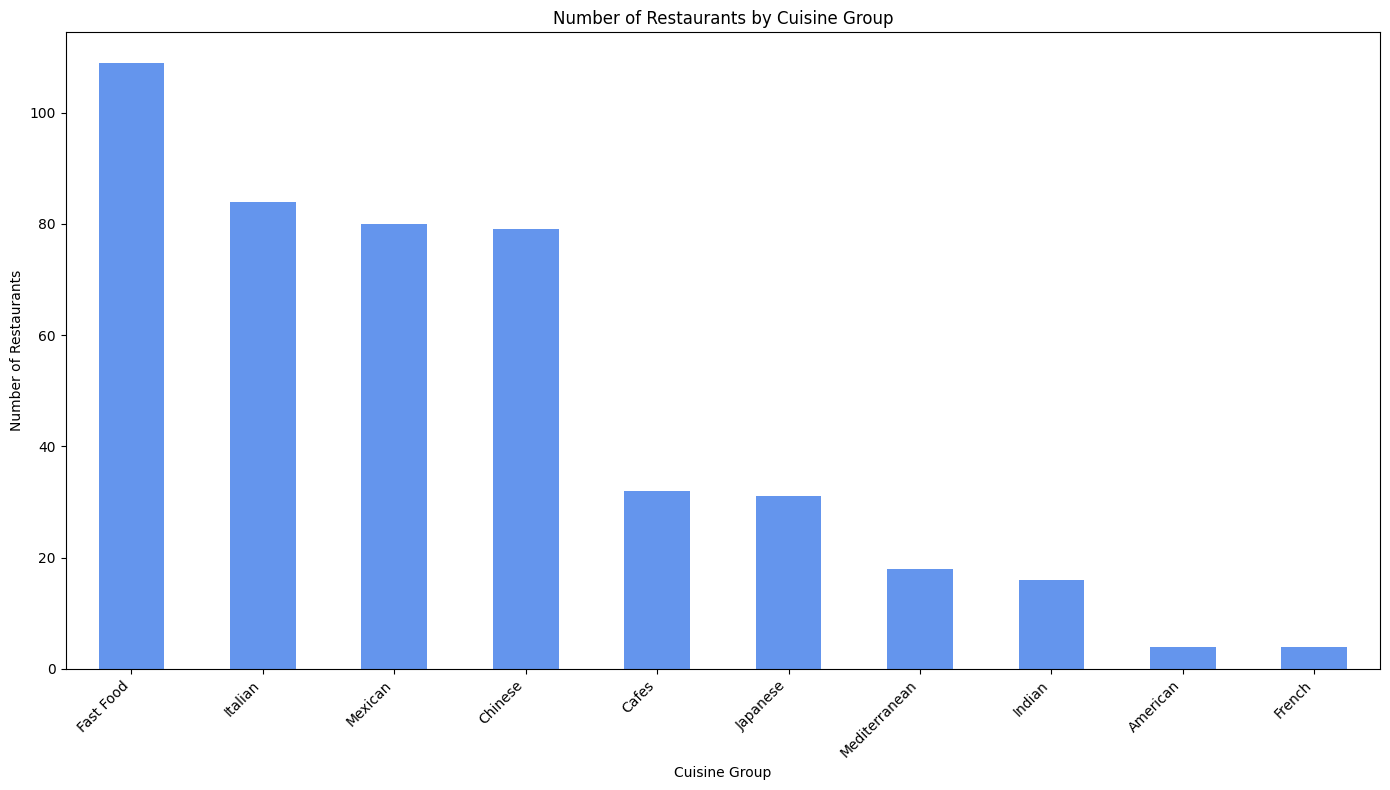

In [ ]:
import matplotlib.pyplot as plt

# Count the unique restaurant IDs for each cuisine group
restaurant_counts = expanded_reviews.groupby('cuisine_group')['rid'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
restaurant_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Number of Restaurants by Cuisine Group')
plt.xlabel('Cuisine Group')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

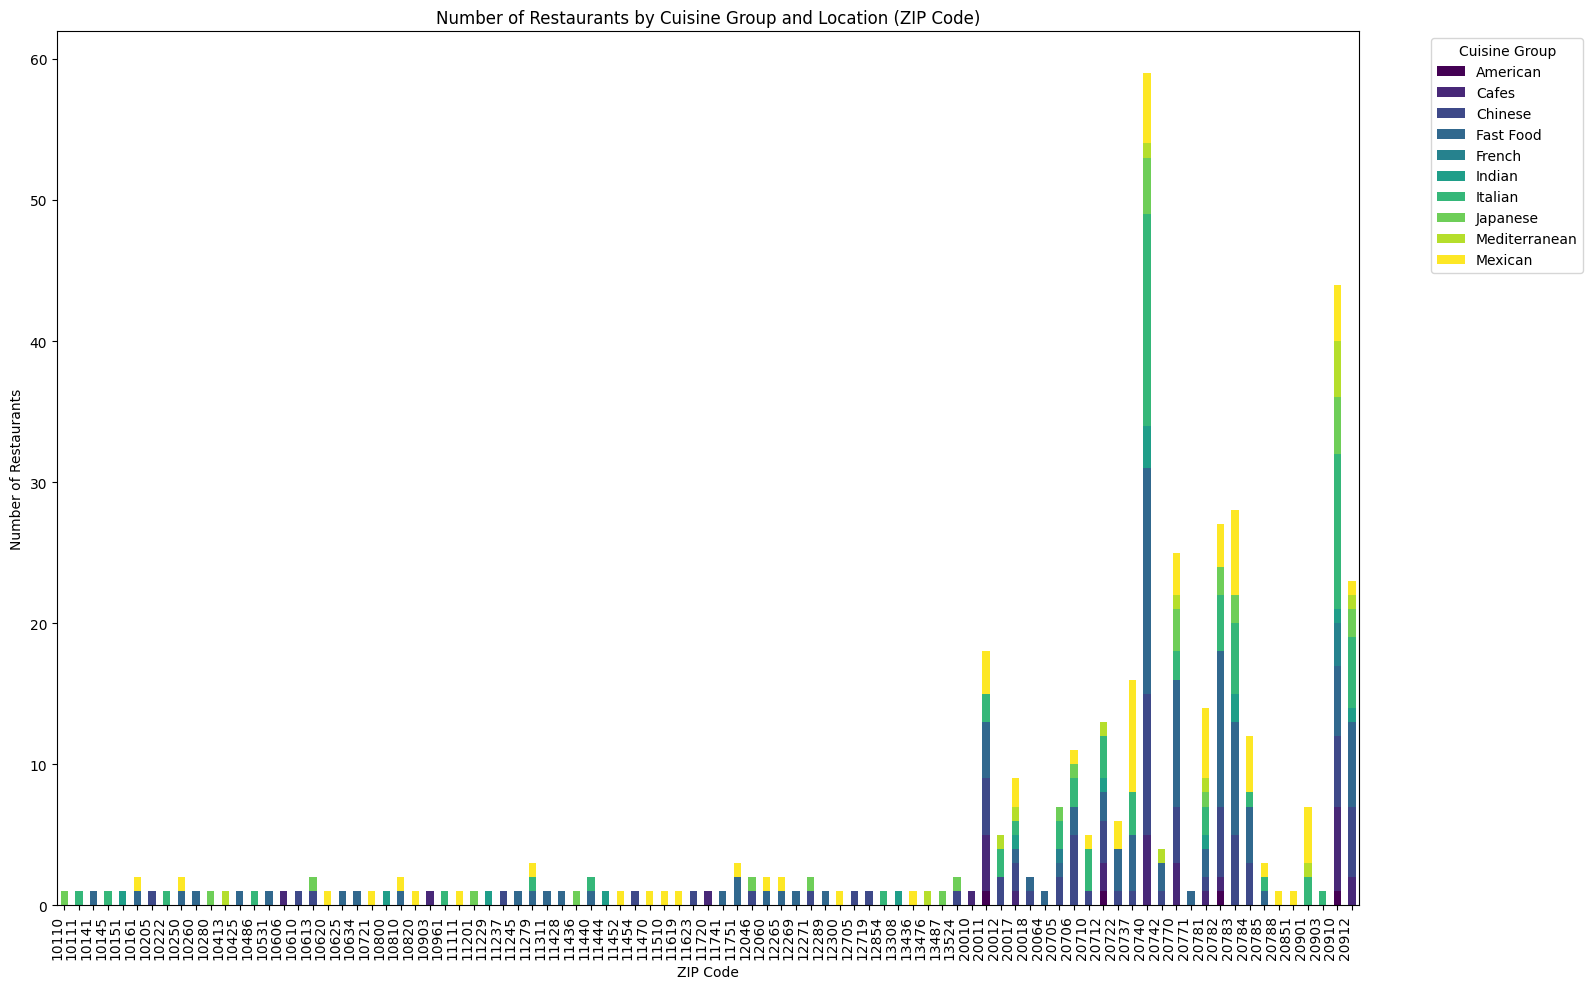

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract ZIP code from address assuming it's the last part of the address
expanded_reviews['zip_code'] = expanded_reviews['address'].str.extract(r'(\d{5})')

# Count the number of restaurants per cuisine group by ZIP code
cuisine_location_counts = expanded_reviews.groupby(['zip_code', 'cuisine_group'])['rid'].nunique().unstack(fill_value=0)

# Plotting the data as a heatmap-like bar chart to show distribution
cuisine_location_counts.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')
plt.title('Number of Restaurants by Cuisine Group and Location (ZIP Code)')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Cuisine Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

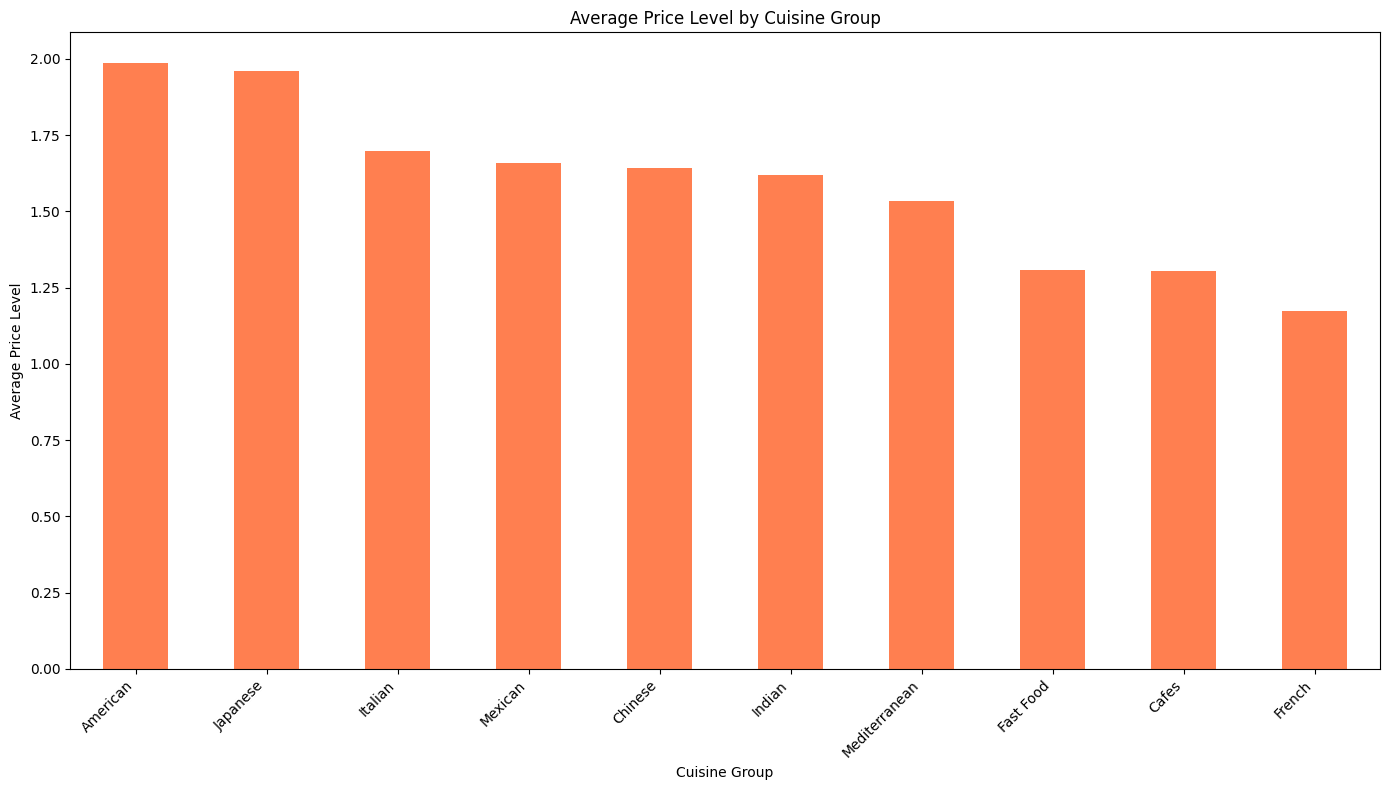

In [ ]:
import matplotlib.pyplot as plt

# Ensure price_level is numeric for averaging
expanded_reviews['price_level'] = pd.to_numeric(expanded_reviews['price_level'], errors='coerce')

# Calculate the average price level for each cuisine group
average_price_by_cuisine = expanded_reviews.groupby('cuisine_group')['price_level'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
average_price_by_cuisine.plot(kind='bar', color='coral')
plt.title('Average Price Level by Cuisine Group')
plt.xlabel('Cuisine Group')
plt.ylabel('Average Price Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()